# Hithesh Shanmgugam
# CSC 583
# HW 2

# Import Necessary packages

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
import re
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Sample-2023 Exercise

In [2]:
# read in input file
with open('C:/Users/sures/OneDrive - DePaul University/Desktop/sample-2023.txt', 'r', encoding='utf8') as f:
    text = f.read().lower()

# tokenize words and apply rules for punctuation and contractions
tokens = word_tokenize(text)
new_tokens = []
for i in range(len(tokens)):
    token = tokens[i]
    if token in ['n\'t', 'shan’t']:
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('not')
    elif token == '\'ll':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('will')
    elif token == '\'ve':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('have')
    elif token == '\'d':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('would')
    elif token == '\'re':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('are')
    elif token == '\'s':
        if i > 0 and tokens[i-1] == 'let':
            new_tokens.pop()
            new_tokens.append('let')
            new_tokens.append('us')
        elif i > 0 and tokens[i-1] in ['he', 'she', 'it', 'that', 'here', 'there', 'what', 'when', 'where', 'which', 'who', 'how']:
            new_tokens.pop()
            new_tokens.append(tokens[i-1])
            new_tokens.append('is')
        else:
            new_tokens.pop()
            new_tokens.append(token[:-2])
            new_tokens.append('\'s')
    elif token == 'i\'m':
        new_tokens.pop()
        new_tokens.append('i')
        new_tokens.append('am')
    else:
        if i > 0 and (token[0] in ['.', ',', '!', '?', ':', ';'] or token[:2] in ['--', '``', '\'\'']):
            new_tokens += list(token[:-1])
            new_tokens.append(token[-1])
        elif i < len(tokens)-1 and (token[-1] in ['.', ',', '!', '?', ':', ';'] or token[-2:] in ['--', '``', '\'\'']):
            new_tokens.append(token[0])
            new_tokens += list(token[1:])
        else:
            new_tokens.append(token)


# Split the text into lines
lines = text.splitlines()
# Count the number of non-empty lines to get the number of paragraphs
num_paragraphs = sum(1 for line in lines if line.strip())

# count sentences
sentences = sent_tokenize(text)
num_sentences = len(sentences)

# initialize word count and unique word count
word_count = 0
unique_words = set()
for sentence in sentences:
    # tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # update the word count
    word_count += len(words)
    
# count unique words
unique_words, counts = np.unique(new_tokens, return_counts=True)
num_unique_words = len(unique_words)

# create frequency count dictionary
freq_counts = dict(zip(unique_words, counts))


# sort the word types by frequency counts and lexicographical order
sorted_freq_counts = sorted(freq_counts.items(), key=lambda x: (-x[1], x[0]))

# write the output to file
with open('C:/Users/sures/OneDrive - DePaul University/Desktop/output1.txt', 'w') as f:
    # write counts/statistics at the top of the file
    f.write("Hithesh Shanmugam\n")
    f.write("CSC 583\n")
    f.write("HW2\n")
    f.write("******************")
    f.write("\n")
    f.write("# of paragraphs = {}\n".format(num_paragraphs))
    f.write("# of sentences = {}\n".format(num_sentences))
    f.write("# of tokens = {}\n".format(word_count))
    f.write("# of unique tokens = {}\n".format(num_unique_words))
    f.write("\n")
    f.write("******************")
    f.write("\n")
    # write top 25 frequency counts to file
    f.write("Rank  Word            Frequency\n")
    for i, (word, count) in enumerate(sorted_freq_counts[:25]):
        f.write("{:4d}  {:15s} {:5d}\n".format(i+1, word, count))

# print results
print("Total number of paragraphs:", num_paragraphs)
print("Total number of sentences:", num_sentences)
print("Total number of words/tokens:", word_count)
print("Total number of unique words/tokens:", num_unique_words)

Total number of paragraphs: 8
Total number of sentences: 31
Total number of words/tokens: 561
Total number of unique words/tokens: 277


# Plot using Zipf's law

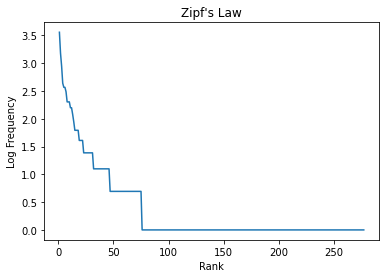

In [3]:
# get the frequencies and sort them in descending order
freq_counts = dict(zip(unique_words, counts))
sorted_freq_counts = sorted(freq_counts.items(), key=lambda x: (-x[1], x[0]))

# create a list of the word frequencies in descending order
freq_list = sorted(freq_counts.items(), key=lambda x: (-x[1], x[0]))

# extract the frequencies and their corresponding ranks
ranks = range(1, len(freq_list)+1)
frequencies = [np.log(freq) for word, freq in freq_list]

# plot the log of the frequencies against the ranks
plt.plot(ranks, frequencies)

# add axis labels and a title
plt.xlabel('Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law')

# display the plot
plt.show()

# War and peace exercise

In [4]:
# read in input file
with open('C:/Users/sures/OneDrive - DePaul University/Desktop/war-and-peace.txt', 'r', encoding='ISO-8859-1') as f:
    text = f.read().lower()

# tokenize words and apply rules for punctuation and contractions
tokens = word_tokenize(text)
new_tokens = []
for i in range(len(tokens)):
    token = tokens[i]
    if token in ['n\'t', 'shan’t']:
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('not')
    elif token == '\'ll':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('will')
    elif token == '\'ve':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('have')
    elif token == '\'d':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('would')
    elif token == '\'re':
        new_tokens.pop()
        new_tokens.append(tokens[i-1])
        new_tokens.append('are')
    elif token == '\'s':
        if i > 0 and tokens[i-1] == 'let':
            new_tokens.pop()
            new_tokens.append('let')
            new_tokens.append('us')
        elif i > 0 and tokens[i-1] in ['he', 'she', 'it', 'that', 'here', 'there', 'what', 'when', 'where', 'which', 'who', 'how']:
            new_tokens.pop()
            new_tokens.append(tokens[i-1])
            new_tokens.append('is')
        else:
            new_tokens.pop()
            new_tokens.append(token[:-2])
            new_tokens.append('\'s')
    elif token == 'i\'m':
        new_tokens.pop()
        new_tokens.append('i')
        new_tokens.append('am')
    else:
        if i > 0 and (token[0] in ['.', ',', '!', '?', ':', ';'] or token[:2] in ['--', '``', '\'\'']):
            new_tokens += list(token[:-1])
            new_tokens.append(token[-1])
        elif i < len(tokens)-1 and (token[-1] in ['.', ',', '!', '?', ':', ';'] or token[-2:] in ['--', '``', '\'\'']):
            new_tokens.append(token[0])
            new_tokens += list(token[1:])
        else:
            new_tokens.append(token)

# count paragraphs
paragraphs = re.findall(r'\n{2,}', text)
num_paragraphs = len(paragraphs) + 1

# count sentences
sentences = sent_tokenize(text)
num_sentences = len(sentences)

# initialize word count and unique word count
word_count = 0
unique_words = set()
for sentence in sentences:
    # tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # update the word count
    word_count += len(words)
            
# count unique words
unique_words, counts = np.unique(new_tokens, return_counts=True)
num_unique_words = len(unique_words)

# create frequency count dictionary
freq_counts = dict(zip(unique_words, counts))
# Split the text into lines
lines = text.splitlines()

# sort the word types by frequency counts and lexicographical order
sorted_freq_counts = sorted(freq_counts.items(), key=lambda x: (-x[1], x[0]))

# write the output to file
with open('C:/Users/sures/OneDrive - DePaul University/Desktop/output2.txt', 'w') as f:
    # write counts/statistics at the top of the file
    f.write("Hithesh Shanmugam\n")
    f.write("CSC 583\n")
    f.write("HW2\n")
    f.write("******************")
    f.write("\n")
    f.write("# of paragraphs = {}\n".format(num_paragraphs))
    f.write("# of sentences = {}\n".format(num_sentences))
    f.write("# of tokens = {}\n".format(word_count))
    f.write("# of unique tokens = {}\n".format(num_unique_words))
    f.write("\n")
    f.write("******************")
    f.write("\n")
    # write top 200 frequency counts to file
    f.write("Rank  Word            Frequency\n")
    for i, (word, count) in enumerate(sorted_freq_counts[:200]):
        f.write("{:4d}  {:15s} {:5d}\n".format(i+1, word, count))
        
# print results
print("Total number of paragraphs:", num_paragraphs)
print("Total number of sentences:", num_sentences)
print("Total number of words/tokens:", word_count)
print("Total number of unique words/tokens:", num_unique_words)

Total number of paragraphs: 12169
Total number of sentences: 31911
Total number of words/tokens: 672192
Total number of unique words/tokens: 18672


# Plot using Zipf's law

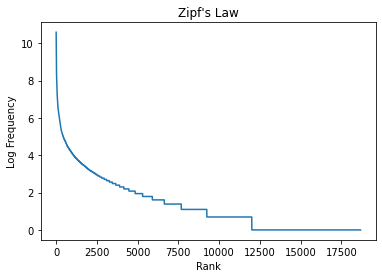

In [5]:
# get the frequencies and sort them in descending order
freq_counts = dict(zip(unique_words, counts))
sorted_freq_counts = sorted(freq_counts.items(), key=lambda x: (-x[1], x[0]))

# create a list of the word frequencies in descending order
freq_list = sorted(freq_counts.items(), key=lambda x: (-x[1], x[0]))

# extract the frequencies and their corresponding ranks
ranks = range(1, len(freq_list)+1)
frequencies = [np.log(freq) for word, freq in freq_list]

# plot the log of the frequencies against the ranks
plt.plot(ranks, frequencies)

# add axis labels and a title
plt.xlabel('Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law')

# display the plot
plt.show()